In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/dados_tratados.csv")
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias
0,0002-ORFBO,Não,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,Não,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sim,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sim,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sim,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [4]:
df = df.drop(columns=['customerID'])
print(df.columns)

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total', 'Contas_Diarias'],
      dtype='object')


In [6]:
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
print("Proporção de Churn (%):")
print(churn_distribution)

if churn_distribution.min() < 25:
    print("\nParece haver um desequilíbrio significativo entre as classes, o que pode afetar os modelos preditivos. Estratégias como oversampling, undersampling ou o uso de algoritmos robustos ao desequilíbrio podem ser necessárias.")

Proporção de Churn (%):
Churn
Não    73.463013
Sim    26.536987
Name: proportion, dtype: float64


In [ ]:
# aplicando técnica de balanceamento com smote

In [7]:
!pip install imblearn

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Separar features (X) e target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Converter a variável target para formato numérico, se ainda não estiver
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identificar colunas categóricas para one-hot encoding antes do SMOTE
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Garantir que todas as colunas sejam numéricas (tratar colunas não-numéricas restantes, se houver)
# Por simplicidade, vamos dropar colunas não numéricas que não foram tratadas por get_dummies
X_encoded = X_encoded.select_dtypes(include=['number', 'bool'])

# Instanciar o SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE apenas nas features e target numéricos
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

print("Distribuição das classes após SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

Distribuição das classes após SMOTE:
0    50.0
1    50.0
Name: proportion, dtype: float64


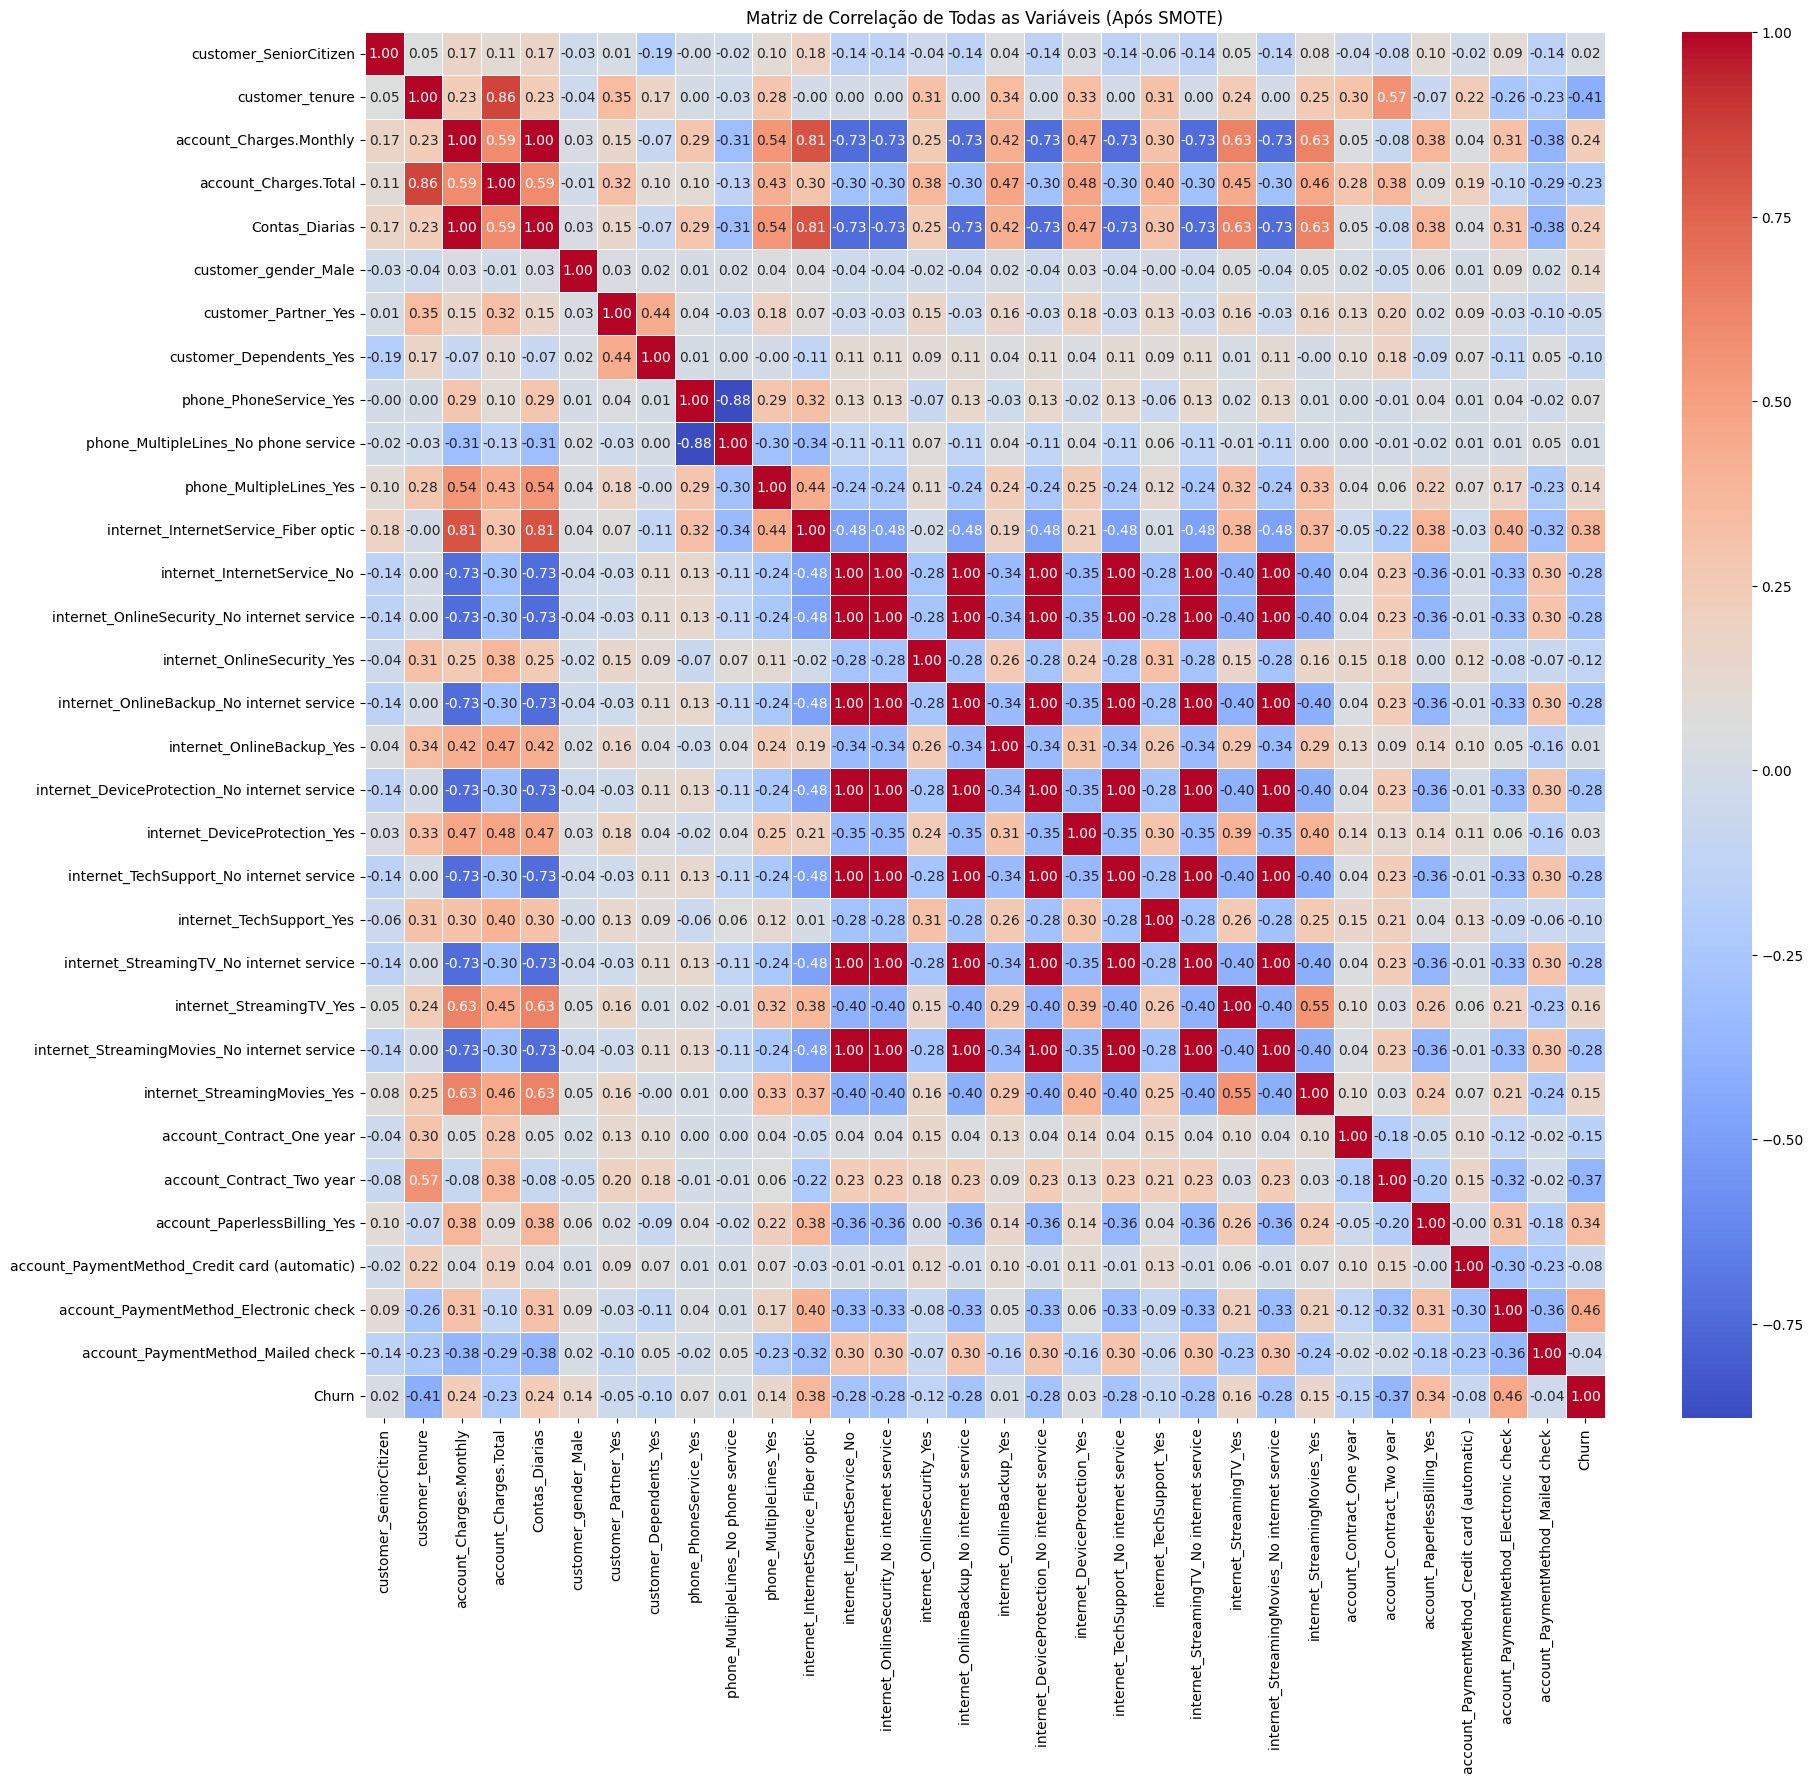

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reconstruir o DataFrame resampled completo para a análise de correlação
df_resampled = pd.DataFrame(X_resampled, columns=X_encoded.columns)
df_resampled['Churn'] = y_resampled

# Calcular a matriz de correlação
correlation_matrix = df_resampled.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação de Todas as Variáveis (Após SMOTE)')
plt.show()

In [10]:
# Exibir as correlações com a variável 'Churn' especificamente
print("Correlações com a variável 'Churn':")
print(correlation_matrix['Churn'].sort_values(ascending=False))

Correlações com a variável 'Churn':
Churn                                            1.000000
account_PaymentMethod_Electronic check           0.460737
internet_InternetService_Fiber optic             0.378470
account_PaperlessBilling_Yes                     0.342487
Contas_Diarias                                   0.235603
account_Charges.Monthly                          0.235603
internet_StreamingTV_Yes                         0.161550
internet_StreamingMovies_Yes                     0.153767
phone_MultipleLines_Yes                          0.143506
customer_gender_Male                             0.140234
phone_PhoneService_Yes                           0.065887
internet_DeviceProtection_Yes                    0.031884
customer_SeniorCitizen                           0.019212
phone_MultipleLines_No phone service             0.012101
internet_OnlineBackup_Yes                        0.007797
account_PaymentMethod_Mailed check              -0.036151
customer_Partner_Yes                

In [11]:
# Investigue como variáveis específicas se relacionam com a evasão, como:
# Tempo de contrato × Evasão
# Total gasto × Evasão

/tmp/ipython-input-419/2349141817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer_tenure', data=df_resampled, palette='viridis')


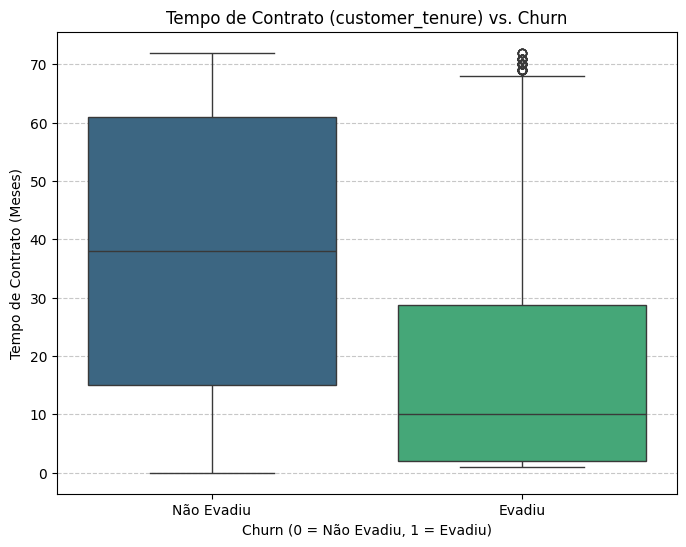

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=df_resampled, palette='viridis')
plt.title('Tempo de Contrato (customer_tenure) vs. Churn')
plt.xlabel('Churn (0 = Não Evadiu, 1 = Evadiu)')
plt.ylabel('Tempo de Contrato (Meses)')
plt.xticks(ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-419/1769787637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account_Charges.Total', data=df_resampled, palette='plasma')


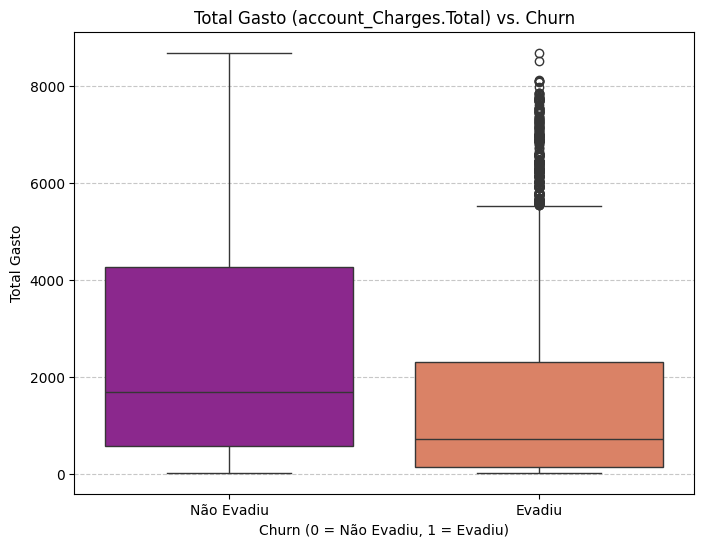

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account_Charges.Total', data=df_resampled, palette='plasma')
plt.title('Total Gasto (account_Charges.Total) vs. Churn')
plt.xlabel('Churn (0 = Não Evadiu, 1 = Evadiu)')
plt.ylabel('Total Gasto')
plt.xticks(ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

print("\nDistribuição das classes em y_train:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)

print("\nDistribuição das classes em y_test:")
print(pd.Series(y_test).value_counts(normalize=True) * 100)

Shape de X_train: (8278, 31)
Shape de X_test: (2070, 31)
Shape de y_train: (8278,)
Shape de y_test: (2070,)

Distribuição das classes em y_train:
1    50.0
0    50.0
Name: proportion, dtype: float64

Distribuição das classes em y_test:
0    50.0
1    50.0
Name: proportion, dtype: float64


# Task
Padronize os dados (X_train e X_test) usando StandardScaler para Regressão Logística, treine modelos de Regressão Logística (com dados padronizados) e Random Forest (com dados não padronizados) e forneça uma justificativa para a escolha de cada modelo e a necessidade de normalização.

In [16]:
from sklearn.preprocessing import StandardScaler

# 2. Crie uma instância de StandardScaler
scaler = StandardScaler()

# 3. Ajuste o scaler aos dados de treinamento (X_train) usando o método .fit()
scaler.fit(X_train)

# 4. Transforme os dados de treinamento (X_train) e teste (X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Opcional: Converter de volta para DataFrame para manter os nomes das colunas e inspecionar
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Shape de X_train_scaled:", X_train_scaled.shape)
print("Shape de X_test_scaled:", X_test_scaled.shape)

Shape de X_train_scaled: (8278, 31)
Shape de X_test_scaled: (2070, 31)


## Treinar Modelos de Regressão Logística e Random Forest

### Subtask:
Treinar um modelo de Regressão Logística utilizando os dados padronizados (`X_train_scaled`, `X_test_scaled`, `y_train`, `y_test`) e um modelo de Random Forest utilizando os dados não padronizados (`X_train`, `X_test`, `y_train`, `y_test`).

### Justificativa para a escolha de cada modelo e a necessidade de normalização:

**Regressão Logística:**
*   **Escolha do modelo:** A Regressão Logística é um modelo linear simples e eficiente para classificação binária. É fácil de interpretar e serve como um bom ponto de partida para problemas de classificação.
*   **Necessidade de normalização/padronização:** Modelos baseados em distância e gradiente, como a Regressão Logística, são sensíveis à escala das features. Features com grandes escalas podem dominar o processo de otimização, impedindo que o modelo aprenda adequadamente as contribuições de features com escalas menores. A padronização (`StandardScaler`) garante que todas as features contribuam igualmente para o modelo, melhorando a convergência do algoritmo e o desempenho.

**Random Forest:**
*   **Escolha do modelo:** Random Forest é um modelo de ensemble baseado em árvores de decisão. É robusto, menos propenso a overfitting (em comparação com árvores de decisão individuais) e geralmente entrega alta performance sem muita tunagem de hiperparâmetros.
*   **Necessidade de normalização/padronização:** Modelos baseados em árvores (como Random Forest, Decision Trees, Gradient Boosting Machines) não são sensíveis à escala das features. As árvores de decisão tomam decisões com base em pontos de corte (limiares) em cada feature, e a ordem relativa ou a distribuição dos valores não é alterada pela padronização. Portanto, padronizar os dados não é necessário e não traria benefícios de desempenho para esses modelos.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- Modelo de Regressão Logística (com dados padronizados) ---
print("\n--- Treinando Modelo de Regressão Logística ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' é bom para datasets pequenos e l1/l2 regularization
log_reg_model.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg_model.predict(X_test_scaled)

print("\nRelatório de Classificação (Regressão Logística):")
print(classification_report(y_test, y_pred_log_reg))
print(f"Acurácia (Regressão Logística): {accuracy_score(y_test, y_pred_log_reg):.4f}")

# --- Modelo de Random Forest (com dados NÃO padronizados) ---
print("\n--- Treinando Modelo de Random Forest ---")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # Usar 100 árvores como default
rf_model.fit(X_train, y_train) # Usar X_train (não padronizado)

y_pred_rf = rf_model.predict(X_test)

print("\nRelatório de Classificação (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print(f"Acurácia (Random Forest): {accuracy_score(y_test, y_pred_rf):.4f}")


--- Treinando Modelo de Regressão Logística ---

Relatório de Classificação (Regressão Logística):
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1035
           1       0.83      0.84      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Acurácia (Regressão Logística): 0.8300

--- Treinando Modelo de Random Forest ---

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.84      0.86      0.85      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

Acurácia (Random Forest): 0.8498


## Final Task

### Subtask:
Fornecer uma justificativa final para a escolha dos modelos e a necessidade (ou não) de normalização para cada um, resumindo os resultados do treinamento.


##Perguntas e Respostas
A escolha dos modelos e a necessidade de normalização foram justificadas da seguinte forma:

## Regressão Logística:
Escolhida por sua simplicidade e eficiência na classificação binária. A normalização (especificamente a padronização usando o StandardScaler) foi considerada necessária porque a Regressão Logística é um modelo baseado em gradiente sensível à escala das características. A padronização garante que todas as características contribuam igualmente, melhorando a convergência e o desempenho do algoritmo.

## Random Forest:
Selecionada por sua robustez, alto desempenho e menor suscetibilidade ao sobreajuste. A normalização foi considerada desnecessária para a Random Forest, pois os modelos baseados em árvores tomam decisões com base em limiares e não são sensíveis à escala das características.

Os resultados do treinamento mostraram que o modelo de Regressão Logística atingiu uma acurácia de 0,8300, enquanto o modelo de Random Forest atingiu uma acurácia ligeiramente maior, de 0,8498.

##Principais Descobertas da Análise de Dados
A padronização dos dados foi aplicada com sucesso aos conjuntos X_train e X_test usando o StandardScaler, resultando em X_train_scaled com dimensões (8278, 31) e X_test_scaled com dimensões (2070, 31).

O modelo de Regressão Logística, treinado com dados padronizados, alcançou uma acurácia de 0,8300 no conjunto de teste, com precisão, recall e F1-score equilibrados em torno de 0,83.
O modelo de Random Forest, treinado com dados não padronizados, apresentou uma acurácia maior, de 0,8498, no conjunto de teste, demonstrando desempenho equilibrado com métricas em torno de 0,85.

A justificativa para o pré-processamento de dados identificou corretamente que a Regressão Logística (um modelo baseado em gradiente) requer padronização, enquanto a Random Forest (um modelo baseado em árvore) não.

##Considerações ou Próximos Passos
O modelo de Random Forest superou o modelo de Regressão Logística nesta tarefa de classificação. Trabalhos futuros poderiam se concentrar no ajuste de hiperparâmetros para ambos os modelos ou na exploração de métodos de conjunto mais complexos para potencialmente alcançar uma precisão ainda maior.
A análise destaca a importância crítica de compreender os princípios subjacentes dos algoritmos de aprendizado de máquina para aplicar técnicas apropriadas de pré-processamento de dados, como demonstrado pelos requisitos distintos de padronização para Regressão Logística versus Random Forest.

In [19]:
# --- Análise de Importância de Variáveis para Regressão Logística ---
print("\n--- Importância das Variáveis (Regressão Logística) ---")
# Os coeficientes da Regressão Logística representam a importância das variáveis
# Como usamos dados padronizados, podemos interpretá-los diretamente.
lr_feature_importance = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': log_reg_model.coef_[0]})
lr_feature_importance['Absolute_Coefficient'] = abs(lr_feature_importance['Coefficient'])
lr_feature_importance = lr_feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print(lr_feature_importance.head(10))

# --- Análise de Importância de Variáveis para Random Forest ---
print("\n--- Importância das Variáveis (Random Forest) ---")
# Random Forest já possui um atributo feature_importances_
rf_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

print(rf_feature_importance.head(10))


--- Importância das Variáveis (Regressão Logística) ---
                                 Feature  Coefficient  Absolute_Coefficient
4                         Contas_Diarias    -4.723975              4.723975
2                account_Charges.Monthly    -4.723975              4.723975
11  internet_InternetService_Fiber optic     4.455230              4.455230
8                 phone_PhoneService_Yes     3.096235              3.096235
1                        customer_tenure    -2.151674              2.151674
22              internet_StreamingTV_Yes     1.687840              1.687840
9   phone_MultipleLines_No phone service     1.678377              1.678377
24          internet_StreamingMovies_Yes     1.655426              1.655426
3                  account_Charges.Total     1.307936              1.307936
10               phone_MultipleLines_Yes     1.000864              1.000864

--- Importância das Variáveis (Random Forest) ---
                                   Feature  Importance
3